# K邻近算法

邻近算法，或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻居来代表

欧式距离；曼哈顿距离；闵可夫斯基距离

交叉验证：在测试集上错误率最小，在训练集上错误率不一定最小

KNN困境：维度增加，距离失效；数据量大，算法超慢

一个机器学习程序需要多少数据训练：首先需要知道维度和特征的信息，维度和特征决定训练集的量

算法流程:
对每一个未知点执行：
=>计算未知点到所有已知类别点的距离
=》按距离排序（升序）
=》选取其中前k个与未知点离得最近的点
=》统计k个点中各个类别的个数
=》上述k个点里类别出现频率最高的作为未知点的类别

优点： 
简单有效、易理解

缺点： 
k近邻需要保存全部数据集，因此对内存消耗大，当数据集较大时对设备要求非常高； 
需要计算每个未知点到全部已知点的距离，可能会很耗时； 
分类结果不易理解

# 预测单个测试data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

录入数据集（此处为人模拟的数据集），X第一列为肿瘤大小，第二列为肿瘤时间，y为肿瘤性质良好还是恶性

In [8]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073273, 1.786360121],
              [1.343892307, 3.362874429],
              [3.580243273, 4.671037091],
              [2.274392744, 2.873335573],
              [7.474390402, 4.673011339],
              [5.772024290, 3.560262131],
              [9.122354845, 2.568264233],
              [7.722344298, 3.479979792],
              [7.978408784, 0.773246244]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

[[3.39353321 2.33127338]
 [3.11007327 1.78636012]
 [1.34389231 3.36287443]
 [3.58024327 4.67103709]
 [2.27439274 2.87333557]
 [7.4743904  4.67301134]
 [5.77202429 3.56026213]
 [9.12235485 2.56826423]
 [7.7223443  3.47997979]
 [7.97840878 0.77324624]]
[0 0 0 0 0 1 1 1 1 1]


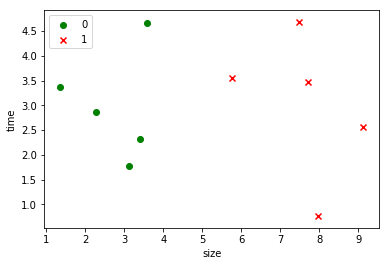

In [28]:
#转为向量传入训练集
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
print (X_train)
print (y_train)

#绘制散点图
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='g', marker='o', label='0')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='r', marker='x', label='1')
plt.xlabel('size')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

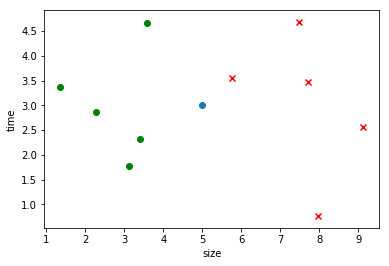

In [23]:
#要预测的点
x = np.array([5, 3])

#图中观测
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='g', marker='o', label='良性')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='r', marker='x', label='恶性')
plt.scatter(x[0], x[1])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

## KNN过程

In [13]:
#求距离
from math import sqrt

distance=[]

for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distance.append(d)
print (distance)

[1.740095064966033, 2.246050932042296, 3.6740714900551215, 2.1927321139070988, 2.728548843438044, 2.986900534321874, 0.9538947320237519, 4.144901113488964, 2.764333387560458, 3.718783561121629]


In [14]:
#从距离数组中获得最近的k个点，如果将X排序，与y则不对应，此处想获得的是索引，所以可以用argsort方法进行排序获得其索引找到最近的k个点在哪

nearest = np.argsort(distance)
nearest

array([6, 0, 3, 1, 4, 8, 5, 2, 9, 7], dtype=int64)

In [16]:
#令k = 6
k = 6
topK_k = [y_train[i] for i in nearest[:6]]
topK_k

[1, 0, 0, 0, 0, 1]

In [18]:
#求投票结果（每种结果各有多少个，比例）

from collections import Counter

Counter(topK_k)  #获取的结果为字典，键为原数组中的各个值，相应的值为出现的次数

votes = Counter(topK_k)
print (votes)

votes.most_common(1)  #找票数最多的点，即值最大的一个或几个（参数传入几，即寻找最大的前几个点）
print (votes.most_common(1))
votes.most_common(2)
print (votes.most_common(2))

Counter({0: 4, 1: 2})
[(0, 4)]
[(0, 4), (1, 2)]


In [ ]:
predict_y = votes.most_common(1)[0][0]
print (predict_y)